# DMML exam: 2024-01-17

The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.

Description of the features:

    1. LB - baseline value - FHR baseline (beats per minute)
    2. AC - accelerations - # of accelerations per second
    3. FM - fetal_movement - # of fetal movements per second
    4. UC - uterine_contractions - # of uterine contractions per second
    5. DL - light_decelerations - # of light decelerations per second
    6. DS - severe_decelerations - # of severe decelerations per second
    7. DP - prolongued_decelerations - # of prolongued decelerations per second
    8. ASTV - abnormal_short_term_variability - percentage of time with abnormal short term variability
    9. MSTV - mean_value_of_short_term_variability - mean value of short term variability
    10. ALTV - percentage_of_time_with_abnormal_long_term_variability - percentage of time with abnormal long term variability
    11. MLTV - mean_value_of_long_term_variability - mean value of long term variability
    12. Width - histogram_width - width of FHR histogram
    13. Min - histogram_min - minimum of FHR histogram
    14. Max - histogram_max - Maximum of FHR histogram
    15. Nmax - histogram_number_of_peaks - # of histogram peaks
    16. Nzeros - histogram_number_of_zeroes - # of histogram zeros
    17. Mode - histogram_mode - histogram mode
    18. Mean - histogram_mean - histogram mean
    19. Median - histogram_median - histogram median
    20. Variance - histogram_variance - histogram variance
    21. Tendency - histogram_tendency - histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric
    NSP - fetal_health - fetal state class code (1=normal; 2=suspect; 3=pathologic)

The **objective of the exercise is to discriminate the fetal state class as Normal, Suspect or Pathologic**


# Instructions summary
0. Rename this file as: *Surname_Name_StudentNumber.ipynb*
1. Import the training set: *cardio_train.csv*
2. Perform an **exploratory analysis**:
    - Report and discuss the results of the analysis
3. Carry out a **classification analysis** aimed at predicting the **class** considering the following setting:
    - Apply a 10-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following:
        - DecisionTree classifier (default params)
        - KNearestNeighbor classifier (default params)
        - RandomForest classifier (default params)
    - Repeat the previous step by adopting a suitable rebalancing
    - Report and discuss the results, motivating the choice of the most suitable model
4. Evaluate and discuss results on the test set:
    - Train the selected model on the training set: *cardio_train.csv*
    - Import the test set: *cardio_test.csv*
    - Report and discuss the results on the test set

**Note**: use markdown cells to provide discussion on code output.

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Upload the following file in MS Teams Assignment
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
     
# Code of conduct
- You can consult the course material (notebooks and slides)
- You can consult the official documentation of the libraries
- You cannot use generative AI tools (e.g., ChatGPT)
- Any form of information leakage between candidates is not allowed: if this is ascertained, exam failure is automatic.

# 1. Import the training set: *cardio_train.csv*


In [1]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import jaccard_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist
from pandas.plotting import scatter_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier

In [2]:
df= pd.read_csv('cardio_train.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,133.0,0.007,0.455,0.003,0.003,0.0,0.000,25.0,1.7,0.0,...,68.0,174.0,7.0,1.0,143.0,132.0,138.0,41.0,0.0,1.0
1,118.0,0.000,0.000,0.008,0.002,0.0,0.000,21.0,1.5,0.0,...,89.0,144.0,1.0,1.0,123.0,118.0,121.0,6.0,0.0,1.0
2,112.0,0.003,0.000,0.004,0.000,0.0,0.000,24.0,1.3,8.0,...,104.0,144.0,0.0,1.0,114.0,114.0,114.0,3.0,-1.0,1.0
3,145.0,0.014,0.026,0.001,0.000,0.0,0.000,40.0,1.1,0.0,...,73.0,186.0,4.0,0.0,165.0,163.0,165.0,11.0,1.0,1.0
4,128.0,0.005,0.011,0.004,0.005,0.0,0.000,30.0,1.7,0.0,...,59.0,177.0,7.0,1.0,133.0,128.0,133.0,30.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,138.0,0.012,0.000,0.006,0.001,0.0,0.000,51.0,1.2,0.0,...,73.0,171.0,8.0,0.0,148.0,147.0,149.0,12.0,1.0,1.0
1696,115.0,0.000,0.000,0.005,0.000,0.0,0.000,21.0,1.6,0.0,...,100.0,141.0,1.0,0.0,114.0,113.0,114.0,2.0,-1.0,1.0
1697,124.0,0.000,0.000,0.000,0.000,0.0,0.000,86.0,0.3,72.0,...,118.0,130.0,1.0,0.0,124.0,124.0,125.0,0.0,0.0,3.0
1698,139.0,0.002,0.002,0.002,0.000,0.0,0.000,64.0,0.4,29.0,...,135.0,163.0,1.0,0.0,161.0,152.0,157.0,13.0,1.0,2.0


# 2. Perform an **exploratory analysis**
- Report and discuss the results of the analysis.



In [3]:
# TODO
df.shape

(1700, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1700 non-null   float64
 1   accelerations                                           1700 non-null   float64
 2   fetal_movement                                          1700 non-null   float64
 3   uterine_contractions                                    1700 non-null   float64
 4   light_decelerations                                     1700 non-null   float64
 5   severe_decelerations                                    1700 non-null   float64
 6   prolongued_decelerations                                1700 non-null   float64
 7   abnormal_short_term_variability                         1700 non-null   float64
 8   mean_value_of_short_term_variability  

I can see that the dataset is composed only by numerical variables, in particular float-type values per variables.
We have 22 columns in total and 1700 entries, none of which seems to contain NaN value, as explained by non-null count column.

Now i want to analyse and perform some exploratory analysis on the dataset excluding the target variable.

In [5]:
numerical= list(set(df)-set(['fetal_health']))
numerical

['histogram_number_of_peaks',
 'histogram_mode',
 'mean_value_of_long_term_variability',
 'histogram_median',
 'fetal_movement',
 'uterine_contractions',
 'histogram_variance',
 'histogram_max',
 'histogram_width',
 'abnormal_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'severe_decelerations',
 'histogram_min',
 'accelerations',
 'histogram_number_of_zeroes',
 'baseline value',
 'mean_value_of_short_term_variability',
 'histogram_mean',
 'light_decelerations',
 'histogram_tendency',
 'prolongued_decelerations']

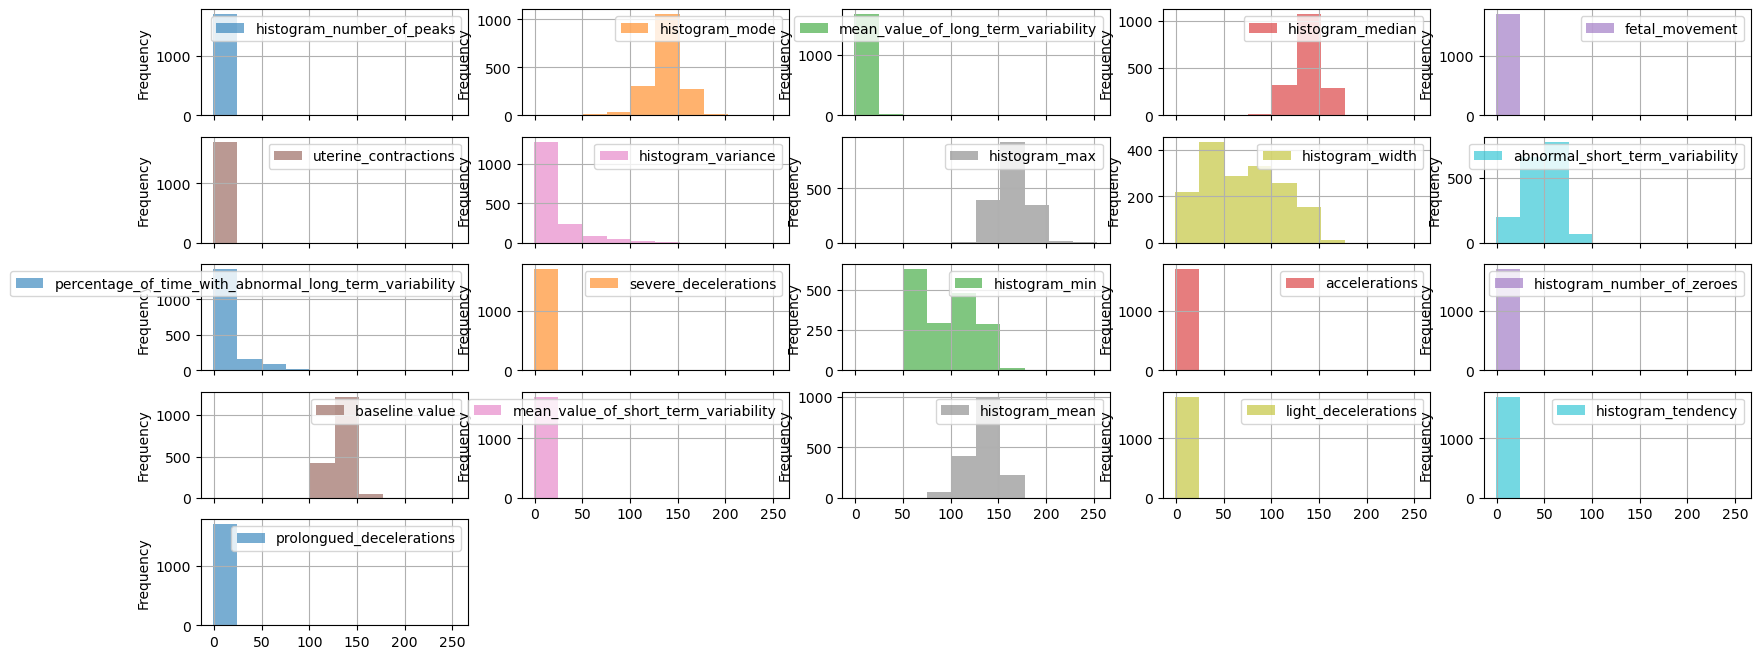

In [6]:
df[numerical].plot(kind='hist',
                  grid=True,
                  alpha=0.6,
                  bins=10,
                  figsize=(20,8),
                  subplots=True,
                  layout=(5,5))
plt.show()

Let's check if there are any missing values

In [7]:
df[numerical].isna().any()

histogram_number_of_peaks                                 False
histogram_mode                                            False
mean_value_of_long_term_variability                       False
histogram_median                                          False
fetal_movement                                            False
uterine_contractions                                      False
histogram_variance                                        False
histogram_max                                             False
histogram_width                                           False
abnormal_short_term_variability                           False
percentage_of_time_with_abnormal_long_term_variability    False
severe_decelerations                                      False
histogram_min                                             False
accelerations                                             False
histogram_number_of_zeroes                                False
baseline value                          

In [8]:
df[numerical].isna().sum(axis=0)

histogram_number_of_peaks                                 0
histogram_mode                                            0
mean_value_of_long_term_variability                       0
histogram_median                                          0
fetal_movement                                            0
uterine_contractions                                      0
histogram_variance                                        0
histogram_max                                             0
histogram_width                                           0
abnormal_short_term_variability                           0
percentage_of_time_with_abnormal_long_term_variability    0
severe_decelerations                                      0
histogram_min                                             0
accelerations                                             0
histogram_number_of_zeroes                                0
baseline value                                            0
mean_value_of_short_term_variability    

There are no missing values in the dataset, so i go on with a statistical analysis using describe() method

In [9]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,133.523529,0.003185,0.009224,0.004391,0.001823,0.000004,0.000152,47.172941,1.322118,10.110588,...,93.911765,164.005294,4.043529,0.324706,137.748235,134.982353,138.468824,18.872941,0.331176,1.304706
std,9.921293,0.003909,0.045783,0.002939,0.002902,0.000064,0.000566,16.897627,0.862934,18.632836,...,29.825081,17.701484,2.932313,0.720000,16.548504,15.690530,14.548155,29.145416,0.606298,0.614788
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.750000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,33.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,94.000000,162.000000,3.000000,0.000000,139.000000,136.000000,140.000000,7.000000,0.000000,1.000000
75%,141.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,12.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,146.000000,149.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.477000,0.015000,0.015000,0.001000,0.005000,87.000000,6.300000,91.000000,...,158.000000,238.000000,18.000000,10.000000,186.000000,182.000000,186.000000,254.000000,1.000000,3.000000


In [10]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
histogram_number_of_peaks,1700.0,4.043529,2.932313,0.0,2.000,3.000,6.000,18.000
histogram_mode,1700.0,137.748235,16.548504,60.0,129.000,139.000,148.000,186.000
mean_value_of_long_term_variability,1700.0,8.171882,5.676988,0.0,4.600,7.400,10.900,50.700
histogram_median,1700.0,138.468824,14.548155,77.0,129.000,140.000,149.000,186.000
fetal_movement,1700.0,0.009224,0.045783,0.0,0.000,0.000,0.003,0.477
uterine_contractions,1700.0,0.004391,0.002939,0.0,0.002,0.005,0.007,0.015
histogram_variance,1700.0,18.872941,29.145416,0.0,2.000,7.000,24.000,254.000
histogram_max,1700.0,164.005294,17.701484,122.0,152.000,162.000,174.000,238.000
histogram_width,1700.0,70.093529,38.979675,3.0,36.000,67.000,101.000,176.000
abnormal_short_term_variability,1700.0,47.172941,16.897627,12.0,33.000,49.000,61.000,87.000


From the statistical description i can see that some values (like all the histograms-like columns) are similar and probably highly correlated. I can check this by looking at pearsons coefficient and calling the corr() method.

In [11]:
df[numerical].corr()

,histogram_number_of_peaks,histogram_mode,mean_value_of_long_term_variability,histogram_median,fetal_movement,uterine_contractions,histogram_variance,histogram_max,histogram_width,abnormal_short_term_variability,...,severe_decelerations,histogram_min,accelerations,histogram_number_of_zeroes,baseline value,mean_value_of_short_term_variability,histogram_mean,light_decelerations,histogram_tendency,prolongued_decelerations
histogram_number_of_peaks,1.000000,-0.106197,0.041908,-0.124777,0.160121,0.071983,0.459038,0.509970,0.748144,-0.172121,...,0.008446,-0.675109,0.208639,0.290761,-0.122719,0.509675,-0.215615,0.406718,0.108090,0.222868
histogram_mode,-0.106197,1.000000,0.061714,0.932915,-0.048049,-0.099766,-0.316054,0.252905,-0.157160,0.048279,...,-0.239446,0.355500,0.237629,-0.048264,0.709058,-0.303441,0.894479,-0.345944,0.423177,-0.438647
mean_value_of_long_term_variability,0.041908,0.061714,1.000000,0.058965,0.013128,-0.082448,-0.172912,0.006766,0.106546,-0.305286,...,-0.041602,-0.135234,-0.157652,0.145614,-0.026577,0.061771,0.139274,-0.256324,0.138671,-0.224121
histogram_median,-0.124777,0.932915,0.058965,1.000000,-0.059686,-0.138156,-0.291704,0.317941,-0.161451,0.108645,...,-0.180184,0.399708,0.268822,-0.044098,0.790611,-0.326818,0.947960,-0.383990,0.396038,-0.449730
fetal_movement,0.160121,-0.048049,0.013128,-0.059686,1.000000,-0.069135,0.193569,0.091671,0.157971,-0.101290,...,-0.012156,-0.152052,0.059809,-0.014583,-0.032553,0.107389,-0.083329,0.038256,0.012485,0.250018
uterine_contractions,0.071983,-0.099766,-0.082448,-0.138156,-0.069135,1.000000,0.230000,0.121432,0.136565,-0.236106,...,0.007083,-0.106412,0.091332,0.051840,-0.143819,0.299418,-0.190925,0.296686,-0.070976,0.083886
histogram_variance,0.459038,-0.316054,-0.172912,-0.291704,0.193569,0.230000,1.000000,0.444674,0.623149,-0.145318,...,0.151609,-0.550501,0.133403,0.208990,-0.141802,0.559748,-0.406313,0.566428,-0.082620,0.519933
histogram_max,0.509970,0.252905,0.006766,0.317941,0.091671,0.121432,0.444674,1.000000,0.683496,-0.126658,...,-0.023897,-0.299780,0.410760,0.199737,0.289185,0.411971,0.217420,0.208875,-0.122296,0.116765
histogram_width,0.748144,-0.157160,0.106546,-0.161451,0.157971,0.136565,0.623149,0.683496,1.000000,-0.264548,...,0.050763,-0.901281,0.312873,0.330083,-0.152125,0.667190,-0.273053,0.518912,0.123910,0.268398
abnormal_short_term_variability,-0.172121,0.048279,-0.305286,0.108645,-0.101290,-0.236106,-0.145318,-0.126658,-0.264548,1.000000,...,0.037950,0.270576,-0.281407,-0.152752,0.297773,-0.416065,0.066315,-0.105050,-0.005364,0.051568


It's easier to check the correlation by using a heatmap, to have a visual explanation.

<Axes: >

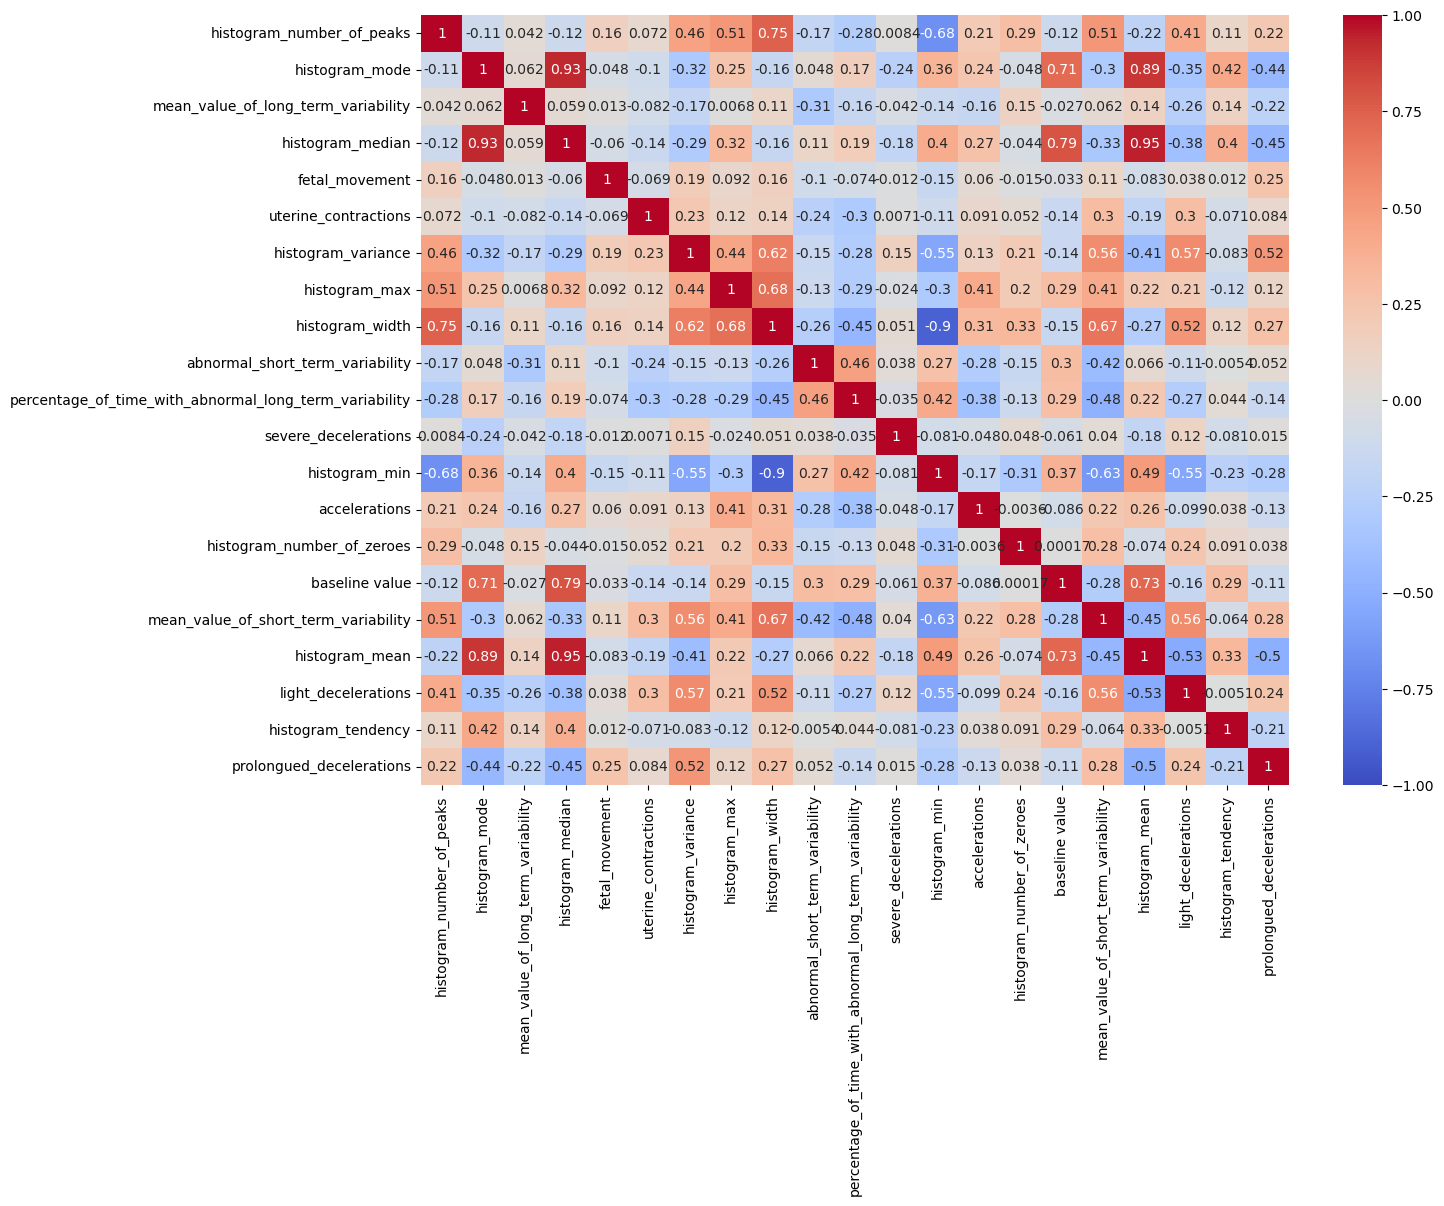

In [12]:
plt.figure(figsize= (14, 10))
sns.heatmap(df[numerical].corr(), annot = True, vmin=-1, vmax=1,cmap = "coolwarm")

Since I see a strong positive correlation with a pearson coefficient of 0.95 for histogram mean and histogram median, I would drop one of the two columns. 

I can see that histogram_min and histogram_width variables present some strong correlation, this time negative one. 

Also the histogram mode column presents some powerful correlation with the histogram mean and the histogram median. 

The remaining variables are either slightly correlated or incorrelated, meaning that each may have a different impact on the target variable.

In [13]:
from scipy.stats import pearsonr
pearsonr(df['histogram_mean'], df['histogram_median'])

PearsonRResult(statistic=0.9479595596521833, pvalue=0.0)

In [14]:
df[['histogram_mean', 'histogram_median']].value_counts()

histogram_mean  histogram_median
143.0           145.0               24
144.0           146.0               23
135.0           137.0               23
147.0           149.0               20
145.0           147.0               18
                                    ..
121.0           130.0                1
                129.0                1
                127.0                1
                125.0                1
182.0           186.0                1
Name: count, Length: 588, dtype: int64

In [15]:
df['histogram_mean'].unique().sum()

12744.0

In [16]:
df['histogram_median'].unique().sum()

12345.0

Since histogram_mean variable has more unique value, I would drop histogram_median.

In [17]:
df.drop(['histogram_median'], axis=1, inplace=True)

In [18]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_variance,histogram_tendency,fetal_health
0,133.0,0.007,0.455,0.003,0.003,0.0,0.000,25.0,1.7,0.0,...,106.0,68.0,174.0,7.0,1.0,143.0,132.0,41.0,0.0,1.0
1,118.0,0.000,0.000,0.008,0.002,0.0,0.000,21.0,1.5,0.0,...,55.0,89.0,144.0,1.0,1.0,123.0,118.0,6.0,0.0,1.0
2,112.0,0.003,0.000,0.004,0.000,0.0,0.000,24.0,1.3,8.0,...,40.0,104.0,144.0,0.0,1.0,114.0,114.0,3.0,-1.0,1.0
3,145.0,0.014,0.026,0.001,0.000,0.0,0.000,40.0,1.1,0.0,...,113.0,73.0,186.0,4.0,0.0,165.0,163.0,11.0,1.0,1.0
4,128.0,0.005,0.011,0.004,0.005,0.0,0.000,30.0,1.7,0.0,...,118.0,59.0,177.0,7.0,1.0,133.0,128.0,30.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,138.0,0.012,0.000,0.006,0.001,0.0,0.000,51.0,1.2,0.0,...,98.0,73.0,171.0,8.0,0.0,148.0,147.0,12.0,1.0,1.0
1696,115.0,0.000,0.000,0.005,0.000,0.0,0.000,21.0,1.6,0.0,...,41.0,100.0,141.0,1.0,0.0,114.0,113.0,2.0,-1.0,1.0
1697,124.0,0.000,0.000,0.000,0.000,0.0,0.000,86.0,0.3,72.0,...,12.0,118.0,130.0,1.0,0.0,124.0,124.0,0.0,0.0,3.0
1698,139.0,0.002,0.002,0.002,0.000,0.0,0.000,64.0,0.4,29.0,...,28.0,135.0,163.0,1.0,0.0,161.0,152.0,13.0,1.0,2.0


In [19]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_variance', 'histogram_tendency', 'fetal_health'],
      dtype='object')

In [20]:
X, y= df.drop('fetal_health', axis=1), df['fetal_health']

Now I want to quickly see the distribution of the target variable.

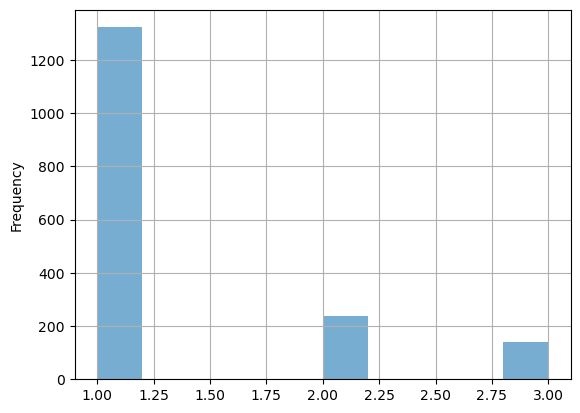

In [21]:
df['fetal_health'].plot(kind='hist', grid=True, alpha=0.6)
plt.show()

<Axes: xlabel='fetal_health', ylabel='Count'>

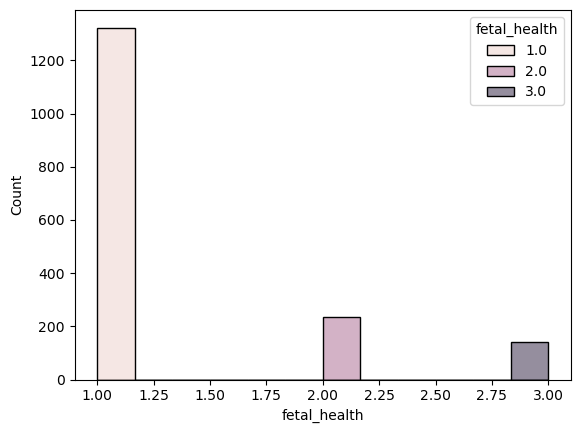

In [22]:
sns.histplot(data=df, x='fetal_health', hue='fetal_health')

<Axes: ylabel='count'>

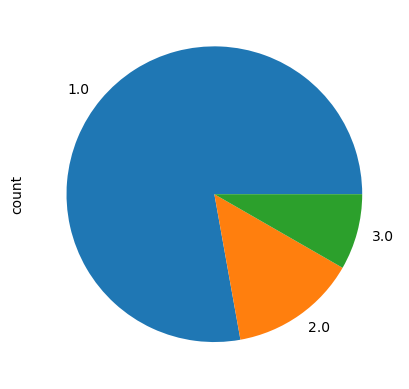

In [23]:
df["fetal_health"].value_counts().plot.pie()

# 3. Carry out a **classification analysis** aimed at predicting the **class** considering the following setting:
- Apply a 10-fold cross-validation procedure on the dataset to identify the most suitable classifier among the following:
    - DecisionTree classifier (default params)
    - KNearestNeighbor classifier (default params)
    - RandomForest classifier (default params)
- Repeat the previous step by adopting a suitable rebalancing
- Report and discuss the results, motivating the choice of the most suitable model


Now with a function to evaluate cross validation I can obtain a list of accuracy, computing the average per-class metrics (concatenating the list of splitted dataframes, splitting occurs through stratified k fold in this case) and then computing the average accuracy by using numpy operation (np.mean) on the accuracy list.

In [24]:
# TODO
def eval_cross_validation(pipeline, X, y):
    list_df = []
    list_accuracy = []
    for train, val in skf.split(X, y):
        # fit and predict using pipeline
        X_tr = X.values[train]#9 k-1
        y_tr = y.values[train]
        X_val = X.values[val]#1
        y_val = y.values[val]
        pipeline.fit(X_tr,y_tr)
        y_pred = pipeline.predict(X_val)
        # compute classification report
        cr = classification_report(y_val, y_pred, output_dict = True, zero_division = np.nan)
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
        list_df.append(df)
        
    df_concat = pd.concat(list_df)
    by_row_index = df_concat.groupby(df_concat.index)
    df_avg = by_row_index.mean().round(3)

    accuracy_avg = np.mean(list_accuracy)
    
    return df_avg, accuracy_avg

In [25]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, make_scorer, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

Now I create sklearn pipelines (that chains estimators) in order to encapsulate all the passages in one and to avoid data leakage.

In [26]:
estimators= [('missing', SimpleImputer(strategy='mean')),
            ('scaling', StandardScaler()),
            ('clf', DecisionTreeClassifier())]
pipe_dt= Pipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe_dt, X, y)

Accuracy for decision tree is:  0.9241176470588236


,1.0,2.0,3.0,macro avg,weighted avg
f1-score,0.955,0.766,0.894,0.871,0.924
precision,0.952,0.792,0.898,0.881,0.926
recall,0.958,0.751,0.900,0.870,0.924
support,132.300,23.600,14.100,170.000,170.000


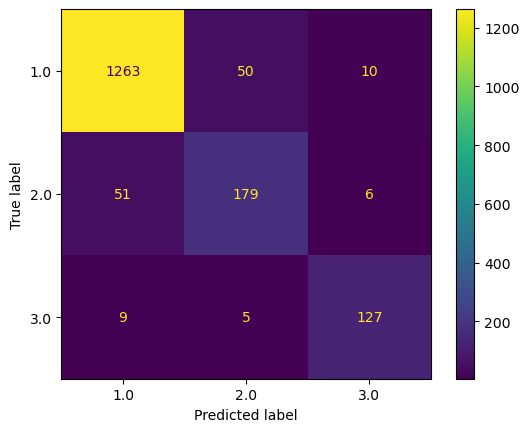

In [27]:
print('Accuracy for decision tree is: ', acc)
display(df_metrics)
y_pred= cross_val_predict(pipe_dt, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred)

In [28]:
dt= cross_val_score(pipe_dt, X, y, scoring=make_scorer(f1_score, average='macro'), cv=skf)
dt

array([0.88796879, 0.83621795, 0.87962568, 0.89396132, 0.79513445,
       0.88136694, 0.88066361, 0.85685082, 0.8927923 , 0.91024617])

Here I computed accuracy for the model, the confusion matrix (to have a visual representation of how good the model is, obtaining precision and recall measurements) and the score for the cross validation on the model through average=macro strategy.

Now i repeat the same for the other 2 classifiers.

In [29]:
estimators= [('missing', SimpleImputer(strategy='mean')),
            ('scaling', StandardScaler()),
            ('clf', KNeighborsClassifier())]
pipe_knn= Pipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe_knn, X, y)

C:\Users\chiar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\chiar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Accuracy for K neighbors is:  0.9005882352941177


,1.0,2.0,3.0,macro avg,weighted avg
f1-score,0.949,0.665,0.787,0.800,0.896
precision,0.929,0.737,0.893,0.853,0.899
recall,0.971,0.619,0.715,0.768,0.901
support,132.300,23.600,14.100,170.000,170.000


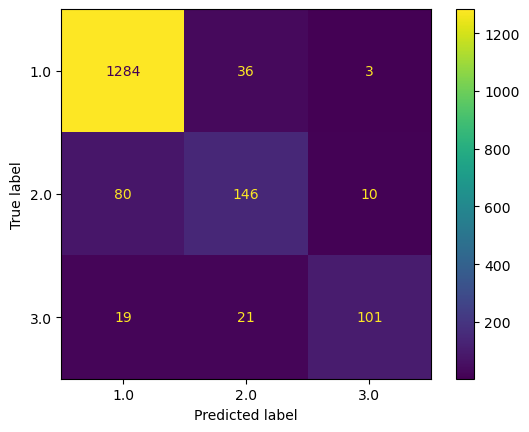

In [30]:
print('Accuracy for K neighbors is: ', acc)
display(df_metrics)
y_pred= cross_val_predict(pipe_knn, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred)

In [31]:
knn= cross_val_score(pipe_knn, X, y, scoring=make_scorer(f1_score, average='macro'), cv=skf)
knn

array([0.79425658, 0.81012886, 0.82704957, 0.76681391, 0.73549973,
       0.7223239 , 0.85912673, 0.79887779, 0.82484059, 0.86476039])

In [32]:
estimators= [('missing', SimpleImputer(strategy='mean')),
            ('scaling', StandardScaler()),
            ('clf', RandomForestClassifier())]
pipe_rf= Pipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe_rf, X, y)

Accuracy for random forest is:  0.9358823529411765


,1.0,2.0,3.0,macro avg,weighted avg
f1-score,0.965,0.780,0.895,0.880,0.933
precision,0.949,0.860,0.942,0.917,0.936
recall,0.982,0.725,0.858,0.855,0.936
support,132.300,23.600,14.100,170.000,170.000


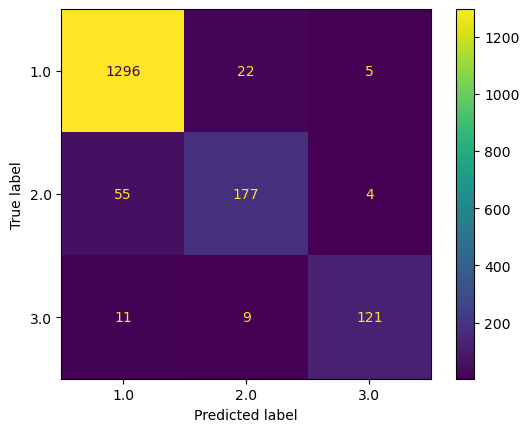

In [33]:
print('Accuracy for random forest is: ', acc)
display(df_metrics)
y_pred= cross_val_predict(pipe_rf, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred)

In [34]:
rf= cross_val_score(pipe_rf, X, y, scoring= make_scorer(f1_score, average='macro'), cv=skf)
rf

array([0.8910614 , 0.87252143, 0.88331898, 0.88910811, 0.80948569,
       0.89971989, 0.91305916, 0.89664502, 0.9269892 , 0.90730238])

let's put all the results in a dataframe in order to compare the classifiers.

In [35]:
results= pd.DataFrame({'dt': dt, 'knn': knn, 'rf': rf})
results

,dt,knn,rf
0,0.887969,0.794257,0.891061
1,0.836218,0.810129,0.872521
2,0.879626,0.827050,0.883319
3,0.893961,0.766814,0.889108
4,0.795134,0.735500,0.809486
5,0.881367,0.722324,0.899720
6,0.880664,0.859127,0.913059
7,0.856851,0.798878,0.896645
8,0.892792,0.824841,0.926989
9,0.910246,0.864760,0.907302


Text(0, 0.5, 'fetal_health')

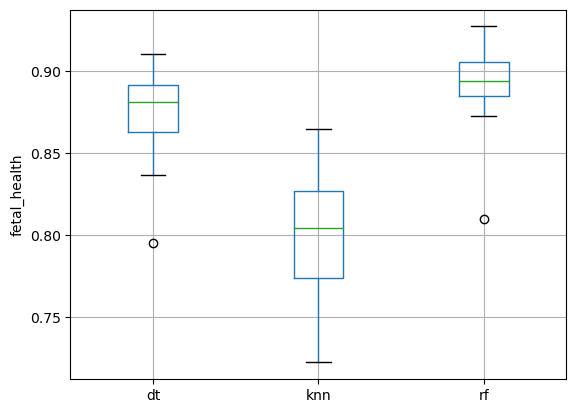

In [36]:
bplot=results.boxplot()
bplot.set_ylabel('fetal_health')

By looking at the accuracy and f-1 metrics, the pipeline for random forest classifier is the most suitable model for our purpose.

Accuracy for decision tree, after sampling, is:  0.9064705882352941


,1.0,2.0,3.0,macro avg,weighted avg
f1-score,0.946,0.709,0.883,0.846,0.908
precision,0.954,0.693,0.876,0.841,0.911
recall,0.938,0.733,0.900,0.857,0.906
support,132.300,23.600,14.100,170.000,170.000


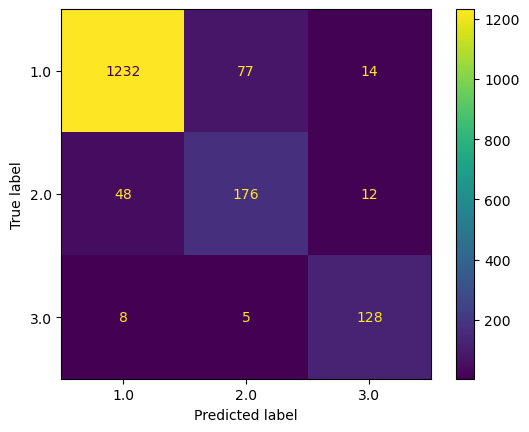

In [37]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline
estimators= [('missing', SimpleImputer(strategy='mean')),
            ('scaling', StandardScaler()),
            ('sampling', SMOTE(random_state=42)),
            ('clf', DecisionTreeClassifier())]
pipe_dt= ImbPipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe_dt, X, y)

print('Accuracy for decision tree, after sampling, is: ', acc)
display(df_metrics)
y_pred= cross_val_predict(pipe_dt, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred)

In [38]:
dt= cross_val_score(pipe_dt, X, y, scoring=make_scorer(f1_score, average='macro'), cv=skf)
dt

array([0.85181847, 0.81178704, 0.84593562, 0.83377082, 0.73906367,
       0.8870486 , 0.8292735 , 0.85081082, 0.90568813, 0.82919287])

Accuracy for K neighbors, after sampling, is:  0.8782352941176471


,1.0,2.0,3.0,macro avg,weighted avg
f1-score,0.934,0.670,0.813,0.805,0.887
precision,0.979,0.562,0.810,0.784,0.907
recall,0.893,0.831,0.821,0.848,0.878
support,132.300,23.600,14.100,170.000,170.000


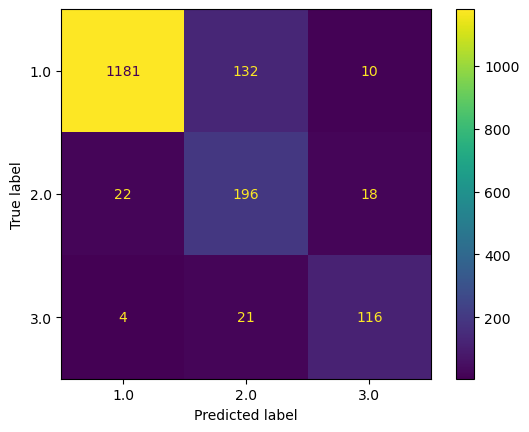

In [39]:
estimators= [('missing', SimpleImputer(strategy='mean')),
            ('scaling', StandardScaler()),
            ('sampling', SMOTE(random_state=42)),
            ('clf', KNeighborsClassifier())]
pipe_knn= ImbPipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe_knn, X, y)

print('Accuracy for K neighbors, after sampling, is: ', acc)
display(df_metrics)
y_pred= cross_val_predict(pipe_knn, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred)

In [40]:
knn= cross_val_score(pipe_knn, X, y, scoring=make_scorer(f1_score, average='macro'), cv=skf)
knn

array([0.783963  , 0.83630952, 0.79278953, 0.75720693, 0.82300818,
       0.75184227, 0.82741532, 0.84901587, 0.78034088, 0.85241055])

Accuracy for random forest, after sampling, is:  0.9358823529411765


,1.0,2.0,3.0,macro avg,weighted avg
f1-score,0.964,0.800,0.896,0.887,0.936
precision,0.967,0.797,0.903,0.889,0.938
recall,0.962,0.810,0.900,0.891,0.936
support,132.300,23.600,14.100,170.000,170.000


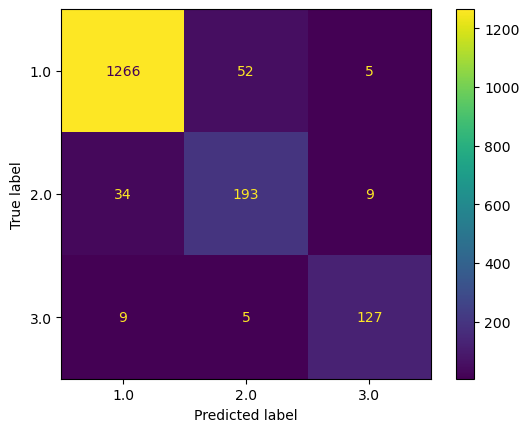

In [41]:
estimators= [('missing', SimpleImputer(strategy='mean')),
            ('scaling', StandardScaler()),
            ('sampling', SMOTE(random_state=42)),
            ('clf', RandomForestClassifier())]
pipe_rf= ImbPipeline(estimators)
df_metrics, acc= eval_cross_validation(pipe_rf, X, y)

print('Accuracy for random forest, after sampling, is: ', acc)
display(df_metrics)
y_pred= cross_val_predict(pipe_rf, X, y, cv=skf)
ConfusionMatrixDisplay.from_predictions(y, y_pred)

In [42]:
rf= cross_val_score(pipe_rf, X, y, scoring=make_scorer(f1_score, average='macro'), cv=skf)
rf

array([0.88097616, 0.86899817, 0.89158644, 0.85965831, 0.8336585 ,
       0.89934569, 0.90324641, 0.88644689, 0.93878233, 0.90885324])

In [43]:
results= pd.DataFrame({'dt': dt, 'knn': knn, 'rf': rf})
results

,dt,knn,rf
0,0.851818,0.783963,0.880976
1,0.811787,0.836310,0.868998
2,0.845936,0.792790,0.891586
3,0.833771,0.757207,0.859658
4,0.739064,0.823008,0.833659
5,0.887049,0.751842,0.899346
6,0.829274,0.827415,0.903246
7,0.850811,0.849016,0.886447
8,0.905688,0.780341,0.938782
9,0.829193,0.852411,0.908853


Text(0, 0.5, 'fetal_health')

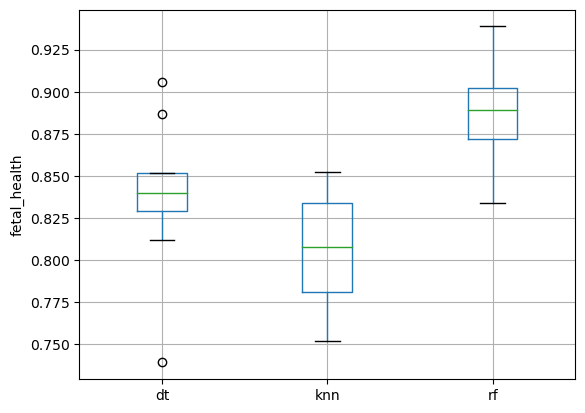

In [44]:
bplot=results.boxplot()
bplot.set_ylabel('fetal_health')

In [45]:
#Statistical comparison
from scipy.stats import wilcoxon
print(wilcoxon(results.dt, results.rf))
print(wilcoxon(results.dt, results.knn))
print(wilcoxon(results.knn, results.rf))

WilcoxonResult(statistic=0.0, pvalue=0.001953125)
WilcoxonResult(statistic=15.0, pvalue=0.232421875)
WilcoxonResult(statistic=0.0, pvalue=0.001953125)


After resampling with SMOTE and checking accuracy score and f1 score, Random forest classifier is once again the most suitable model for our purpose.

By performing wilcoxon test, i wanted to have a statistical comparison of the classifier. I can see that only with the pair decision tree and knn i have a p-value>alpha, where alpha=0.05 (chosen arbitrarly). This means that only in this case I fail to reject the null hypothesis (the samples come from the same distribution).

# 4. Evaluate and discuss results on the test set:
- Train the selected model on the training set: *cardio_train.csv*
- Import the test set: *cardio_test.csv*
- Report and discuss the results on the test set

In [46]:
# TODO
pipe_rf.fit(X,y)

Pipeline(steps=[('missing', SimpleImputer()), ('scaling', StandardScaler()),
                ('sampling', SMOTE(random_state=42)),
                ('clf', RandomForestClassifier())])

In [47]:
test= pd.read_csv('cardio_test.csv')
test

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,133.0,0.008,0.017,0.004,0.000,0.0,0.0,36.0,3.1,0.0,...,54.0,159.0,4.0,0.0,143.0,137.0,142.0,28.0,1.0,1.0
1,114.0,0.011,0.000,0.011,0.000,0.0,0.0,18.0,3.0,0.0,...,76.0,198.0,4.0,1.0,145.0,146.0,147.0,65.0,0.0,1.0
2,141.0,0.000,0.000,0.000,0.000,0.0,0.0,61.0,0.4,29.0,...,135.0,148.0,1.0,0.0,144.0,143.0,145.0,0.0,1.0,2.0
3,145.0,0.000,0.000,0.000,0.002,0.0,0.0,57.0,0.5,0.0,...,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,1.0
4,152.0,0.000,0.000,0.002,0.002,0.0,0.0,61.0,0.5,61.0,...,99.0,160.0,4.0,3.0,159.0,155.0,158.0,4.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,139.0,0.010,0.001,0.008,0.004,0.0,0.0,50.0,1.4,0.0,...,76.0,178.0,10.0,0.0,162.0,144.0,149.0,57.0,1.0,1.0
422,139.0,0.006,0.000,0.005,0.000,0.0,0.0,39.0,0.8,0.0,...,136.0,170.0,1.0,0.0,144.0,146.0,146.0,3.0,-1.0,1.0
423,136.0,0.006,0.000,0.006,0.000,0.0,0.0,43.0,0.7,1.0,...,120.0,159.0,0.0,1.0,145.0,144.0,146.0,2.0,0.0,1.0
424,135.0,0.006,0.000,0.006,0.005,0.0,0.0,27.0,1.5,0.0,...,69.0,165.0,5.0,2.0,143.0,139.0,142.0,17.0,1.0,1.0


In [48]:
X_test= test.drop('fetal_health', axis=1)
y_test= test['fetal_health']

In [49]:
y_pred= pipe_rf.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1323
         2.0       0.99      1.00      1.00       236
         3.0       1.00      1.00      1.00       141

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700



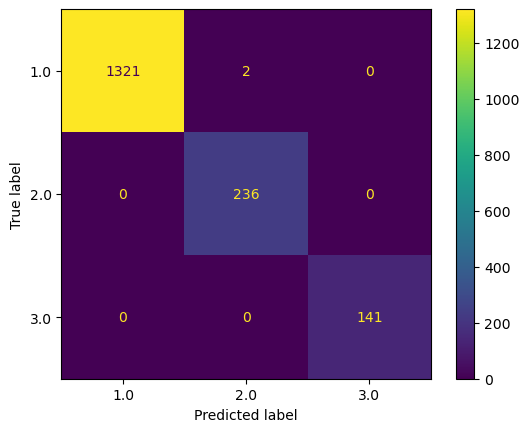

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,values_format = '')
plt.show()

We can see that the selected classifier (random forest) performs really well on the test set too, with a only 2 values predicted wrong on the whole test set. The accuracy and the f-1 score are maximized as well as the other metrics.

# Exam Delivery
- Save the current file 
- Click "**Restart & Run All**" and check consistency (no error, expected results)
- Export using
     - "**File**" --> "**Download as**" --> "**HTML (.html)**"
- Upload the following file in MS Teams Assignment
     - HTML: *Surname_Name_StudentNumber.html*
     - IPYNB: *Surname_Name_StudentNumber.ipynb* 
     
